In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = "Latin Modern Roman"
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['mathtext.fontset'] = "cm"
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")

### Baseline directories:

1/4 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/ <br />
1/8 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/  <br />
1/16 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/  <br />
1/32 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline_OLD/  <br />
#### (Need to change 1/32 to /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/ when it finishes)



/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/ocean.stats.nc
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/ocean.stats.nc
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/ocean.stats.nc
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/ocean.stats.nc


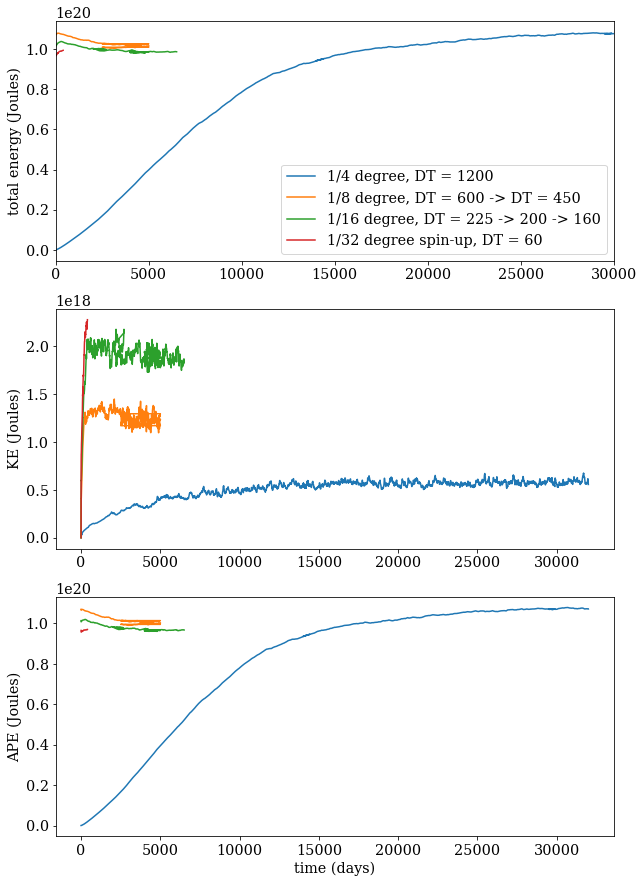

In [2]:
run = [0.25,0.125,0.0625,0.03125]
plt.figure(figsize=(10,15))
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_%sdeg_N15_baseline/ocean.stats.nc' % run[i], decode_times=False)
    plt.plot(os.Time,os.En)
    plt.xlim((0,30000))
    plt.ylabel('total energy (Joules)') 
    plt.gca().legend(('1/4 degree, DT = 1200', '1/8 degree, DT = 600 -> DT = 450', '1/16 degree, DT = 225 -> 200 -> 160', '1/32 degree spin-up, DT = 60')) 
    plt.subplot(3,1,2)
    plt.plot(os.Time,os.KE.sum(axis=1))
    plt.ylabel('KE (Joules)')
    plt.subplot(3,1,3)
    plt.plot(os.Time,os.APE.sum(axis=1))
    plt.ylabel('APE (Joules)')
    plt.xlabel('time (days)')
    print('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_%sdeg_N15_baseline/ocean.stats.nc' % run[i])

#plt.savefig('Energy_quarter_eighth_sixteenth_degree.png', dpi=200,bbox_inches='tight',pad_inches=0)
# DT is the time-step (in seconds) used to run the model
# The slight kink on the 1/8 degree run at 14500 days is because the time-step needed to be reduced because of high CFL with DT = 600 and needed a restart with DT = 450.

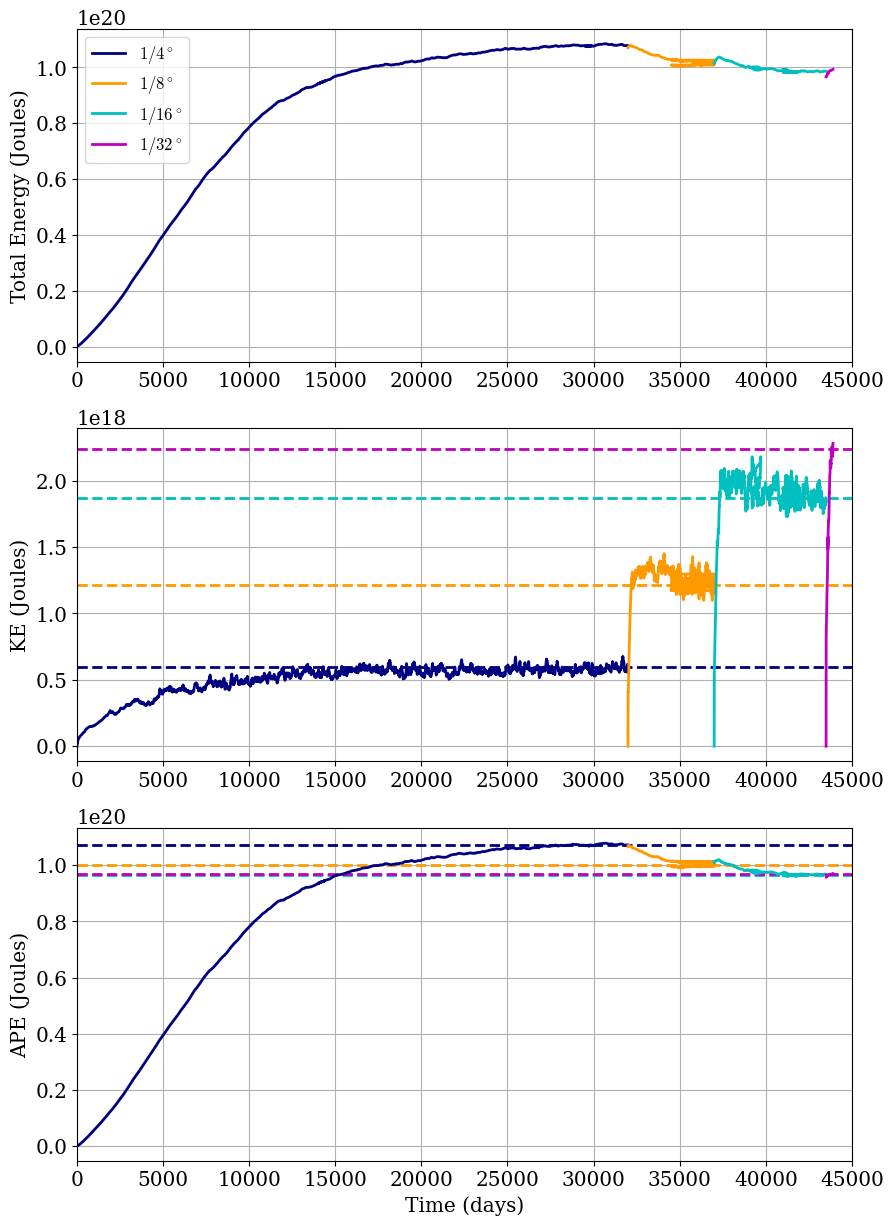

In [58]:

plt.figure(figsize=(10,15),dpi=100)
os1 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/ocean.stats.nc', decode_times=False)
os2 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/ocean.stats.nc', decode_times=False)
os3 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/ocean.stats.nc', decode_times=False)
os4 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/ocean.stats.nc', decode_times=False)

plt.subplot(3,1,1)
#plt.plot([0,50000],[os1.En[-100:].mean('Time'),os1.En[-100:].mean('Time')],'--',color=[0,0,0.5],linewidth=2)
#plt.plot([0,50000],[os2.En[-100:].mean('Time'),os2.En[-100:].mean('Time')],'--',color=[1,.6,0],linewidth=2) #[0:1002]
#plt.plot([0,50000],[os3.En[-100:].mean('Time'),os3.En[-100:].mean('Time')],'--',color='c',linewidth=2)
#plt.plot([0,50000],[os4.En[-5:].mean('Time'),os4.En[-5:].mean('Time')],'--',color='m',linewidth=2)

plt.plot(os1.Time,os1.En,label='$1/4^\circ$',color=[0,0,0.5],linewidth=2)
plt.plot(os2.Time+np.max(os1.Time),os2.En,label='$1/8^\circ$',color=[1,.6,0],linewidth=2) #[0:1002]
plt.plot(os3.Time+np.max(os2.Time)+np.max(os1.Time),os3.En,label='$1/16^\circ$',color='c',linewidth=2)
plt.plot(os4.Time+np.max(os3.Time)+np.max(os2.Time)+np.max(os1.Time),os4.En,label='$1/32^\circ$',color='m',linewidth=2)
plt.xlim((0,45000))
plt.ylabel('Total Energy (Joules)') 
#plt.xlabel('Time (days)')
plt.legend(fontsize=12)
plt.grid()


plt.subplot(3,1,2)
plt.plot([0,50000],[os1.KE[-100:].sum(axis=1).mean('Time'),os1.KE[-100:].sum(axis=1).mean('Time')],'--',color=[0,0,0.5],linewidth=2)
plt.plot([0,50000],[os2.KE[-100:].sum(axis=1).mean('Time'),os2.KE[-100:].sum(axis=1).mean('Time')],'--',color=[1,.6,0],linewidth=2) #[0:1002]
plt.plot([0,50000],[os3.KE[-100:].sum(axis=1).mean('Time'),os3.KE[-100:].sum(axis=1).mean('Time')],'--',color='c',linewidth=2)
plt.plot([0,50000],[os4.KE[-5:].sum(axis=1).mean('Time'),os4.KE[-5:].sum(axis=1).mean('Time')],'--',color='m',linewidth=2)

plt.plot(os1.Time,os1.KE.sum(axis=1),color=[0,0,0.5],linewidth=2)
plt.plot(os2.Time+np.max(os1.Time),os2.KE.sum(axis=1),color=[1,.6,0],linewidth=2)
plt.plot(os3.Time+np.max(os2.Time)+np.max(os1.Time),os3.KE.sum(axis=1),color='c',linewidth=2)
plt.plot(os4.Time+np.max(os3.Time)+np.max(os2.Time)+np.max(os1.Time),os4.KE.sum(axis=1),color='m',linewidth=2)
plt.xlim((0,45000))
plt.ylabel('KE (Joules)')
#plt.xlabel('Time (days)')
plt.grid()

plt.subplot(3,1,3)
plt.plot([0,50000],[os1.APE[-100:].sum(axis=1).mean('Time'),os1.APE[-100:].sum(axis=1).mean('Time')],'--',color=[0,0,0.5],linewidth=2)
plt.plot([0,50000],[os2.APE[-100:].sum(axis=1).mean('Time'),os2.APE[-100:].sum(axis=1).mean('Time')],'--',color=[1,.6,0],linewidth=2) #[0:1002]
plt.plot([0,50000],[os3.APE[-100:].sum(axis=1).mean('Time'),os3.APE[-100:].sum(axis=1).mean('Time')],'--',color='c',linewidth=2)
plt.plot([0,50000],[os4.APE[-5:].sum(axis=1).mean('Time'),os4.APE[-5:].sum(axis=1).mean('Time')],'--',color='m',linewidth=2)

plt.plot(os1.Time,os1.APE.sum(axis=1),color=[0,0,0.5],linewidth=2)
plt.plot(os2.Time+np.max(os1.Time),os2.APE.sum(axis=1),color=[1,.6,0],linewidth=2)
plt.plot(os3.Time+np.max(os2.Time)+np.max(os1.Time),os3.APE.sum(axis=1),color='c',linewidth=2)
plt.plot(os4.Time+np.max(os3.Time)+np.max(os2.Time)+np.max(os1.Time),os4.APE.sum(axis=1),color='m',linewidth=2)
plt.xlim((0,45000))
plt.ylabel('APE (Joules)')
plt.xlabel('Time (days)')
plt.grid()
#     plt.subplot(3,1,3)
#     plt.plot(os.Time,os.APE.sum(axis=1))
#     plt.ylabel('APE (Joules)')

#     print('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_%sdeg_N15_baseline/ocean.stats.nc' % run[i])

In [40]:
os2.KE

<xarray.DataArray 'KE' (Time: 88, Layer: 15)>
array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.086173e+16, 4.995364e+16, 7.959526e+16, ..., 3.890786e+16,
        3.425196e+16, 2.482152e+16],
       [3.209658e+16, 5.274238e+16, 8.247808e+16, ..., 3.510763e+16,
        2.847168e+16, 2.330939e+16],
       ...,
       [7.709395e+16, 1.405437e+17, 2.417905e+17, ..., 8.370045e+16,
        7.457055e+16, 5.752377e+16],
       [7.544885e+16, 1.395499e+17, 2.388269e+17, ..., 8.535597e+16,
        7.829387e+16, 6.147093e+16],
       [7.605581e+16, 1.404504e+17, 2.404908e+17, ..., 8.726713e+16,
        8.164221e+16, 6.518000e+16]])
Coordinates:
  * Layer    (Layer) float64 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * Time     (Time) float64 0.0 5.0 10.0 15.0 20.0 ... 385.0 390.0 395.0 400.0
Attributes:
    long_name:  Total Layer KE
    units:      Joules